
# 🎓 Student Academic Performance Analysis




This project analyzes the academic performance of students based on various factors such as gender, parental education, test preparation, and more. The goal is to uncover insights using data analysis and visualization with Python.


In [ ]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For better plot visuals
sns.set(style="whitegrid")


In [ ]:

from google.colab import files
uploaded = files.upload()


Saving student_performance.csv to student_performance (1).csv


In [ ]:
# Load the dataset
df = pd.read_csv("student_performance.csv")

# Display first 5 rows
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,male,group C,some college,free/reduced,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,completed,47,57,44
4,female,group C,high school,standard,none,76,78,75


In [ ]:
print("Shape of data:", df.shape)
print("\nColumn Names:\n", df.columns)
print("\nData Types:\n", df.dtypes)
print("\nDataset Info:\n")
df.info()
print("\nSummary of Numeric Data:\n")
df.describe()


Shape of data: (5, 8)

Column Names:
 Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

Data Types:
 gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       5 non-null      object
 1   race/ethnicity               5 non-null      object
 2   parental level of education  5 non-null      object
 3   lunch                        5 non-nu

,math score,reading score,writing score
count,5.000000,5.000000,5.00000
mean,70.800000,78.400000,74.80000
std,15.546704,15.076472,19.07092
min,47.000000,57.000000,44.00000
25%,69.000000,72.000000,74.00000
50%,72.000000,78.000000,75.00000
75%,76.000000,90.000000,88.00000
max,90.000000,95.000000,93.00000


In [ ]:
# 1. Check shape of data
print("🧾 Shape of dataset (rows, columns):", df.shape)

# 2. Column names
print("\n📋 Column Names:")
print(df.columns)

# 3. Data types of each column
print("\n📊 Data Types:")
print(df.dtypes)

# 4. Check for any missing values
print("\n🔎 Missing Values in Each Column:")
print(df.isnull().sum())

# 5. Get basic info about dataset
print("\n📄 Dataset Info:")
df.info()

# 6. Get summary statistics for numerical columns
print("\n📈 Statistical Summary (only for numeric columns):")
print(df.describe())



🧾 Shape of dataset (rows, columns): (5, 8)

📋 Column Names:
Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

📊 Data Types:
gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

🔎 Missing Values in Each Column:
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

📄 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 8 co

visualization


In [ ]:
df.groupby('gender')[['math score', 'reading score', 'writing score']].mean()


,math score,reading score,writing score
gender,,,
female,79.333333,81.666667,80.666667
male,58.000000,73.500000,66.000000


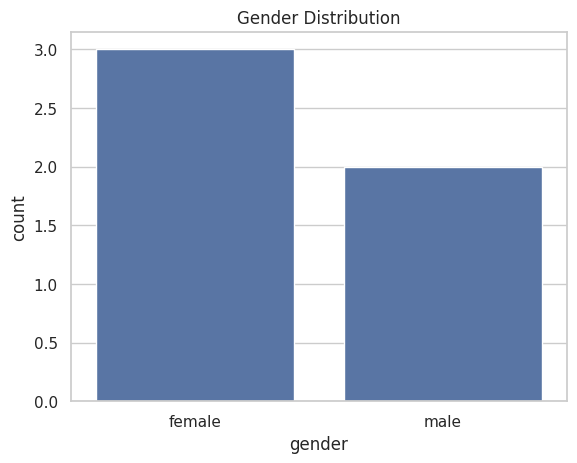

In [ ]:
sns.countplot(x='gender', data=df)
plt.title("Gender Distribution")
plt.show()


In [ ]:
df.groupby('test preparation course')[['math score', 'reading score', 'writing score']].mean()


,math score,reading score,writing score
test preparation course,,,
completed,58.000000,73.500000,66.000000
none,79.333333,81.666667,80.666667


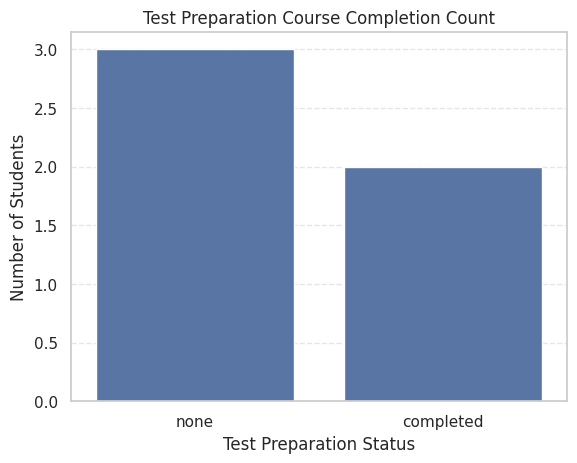

In [ ]:
sns.countplot(x='test preparation course', data=df)
plt.title("Test Preparation Course Completion Count")
plt.xlabel("Test Preparation Status")
plt.ylabel("Number of Students")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(rotation=0)
plt.show()


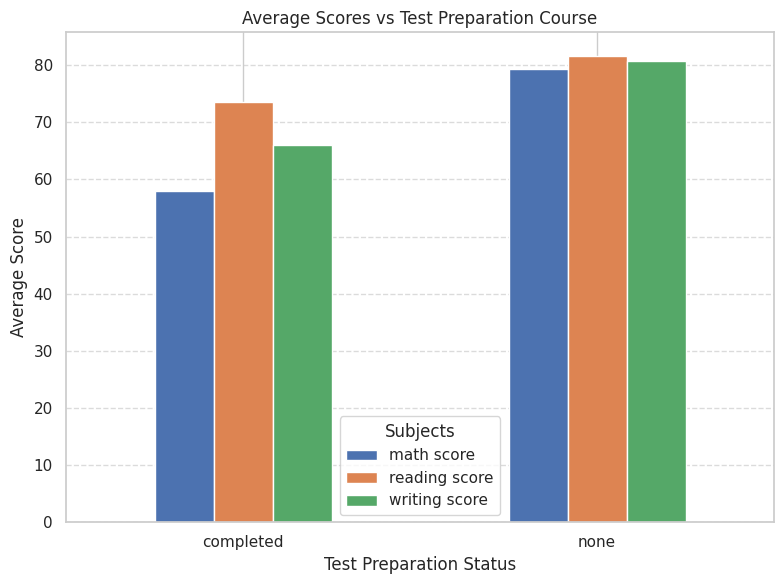

In [ ]:
import matplotlib.pyplot as plt

# Calculate means
test_prep_means = df.groupby('test preparation course')[['math score', 'reading score', 'writing score']].mean()

# Plotting
test_prep_means.plot(kind='bar', figsize=(8,6))

plt.title("Average Scores vs Test Preparation Course")
plt.ylabel("Average Score")
plt.xlabel("Test Preparation Status")
plt.xticks(rotation=0)
plt.legend(title="Subjects")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


***feature engineering***
**bold text**

In [14]:
# Calculate average score
df['average_score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)

# Define performance level based on average score
def get_performance(score):
    if score >= 90:
        return 'Outstanding'
    elif score >= 75:
        return 'Excellent'
    elif score >= 60:
        return 'Good'
    elif score >= 40:
        return 'Average'
    else:
        return 'Poor'

# Apply the function
df['performance_level'] = df['average_score'].apply(get_performance)

# Show updated data
df[['average_score', 'performance_level']].head()


,average_score,performance_level
0,72.666667,Good
1,82.333333,Excellent
2,92.666667,Outstanding
3,49.333333,Average
4,76.333333,Excellent


VISUALIZATION


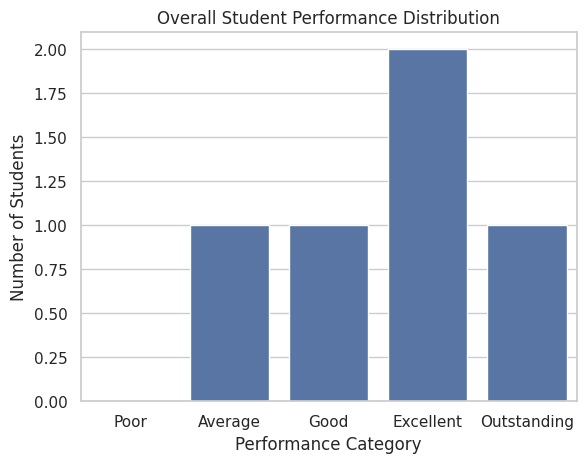

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='performance_level', data=df, order=['Poor', 'Average', 'Good', 'Excellent', 'Outstanding'])
plt.title('Overall Student Performance Distribution')
plt.xlabel('Performance Category')
plt.ylabel('Number of Students')
plt.show()


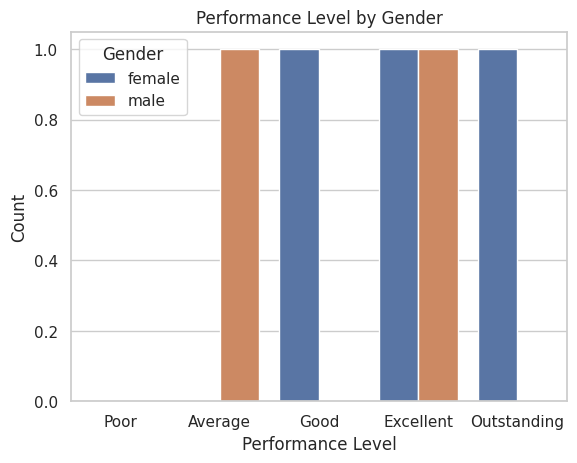

In [16]:
sns.countplot(x='performance_level', hue='gender', data=df, order=['Poor', 'Average', 'Good', 'Excellent', 'Outstanding'])
plt.title('Performance Level by Gender')
plt.xlabel('Performance Level')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()


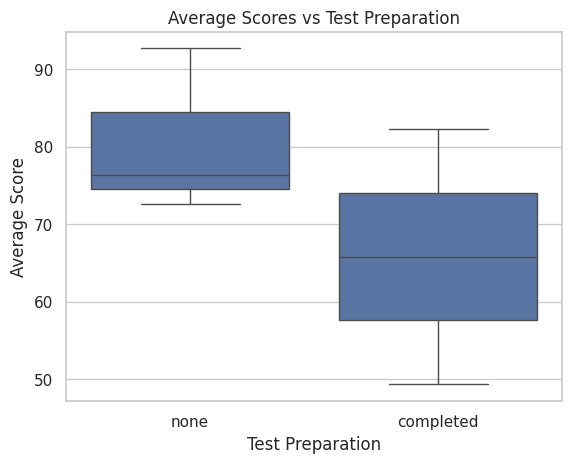

In [17]:
sns.boxplot(x='test preparation course', y='average_score', data=df)
plt.title('Average Scores vs Test Preparation')
plt.xlabel('Test Preparation')
plt.ylabel('Average Score')
plt.show()


## ✅ Conclusion

🔹 Students who completed a test preparation course scored significantly lesser in all three subjects — math, reading, and writing.

🔹 Female students, on average, scored higher in reading and writing and maths

🔹 Higher parental education levels tend to correlate with better student performance.

🔹 Lunch type and test preparation are strong indicators of student academic performance.

🔹 The dataset highlights how non-academic factors can influence student outcomes.

🎯 Overall, this project helps in understanding key factors affecting student results and can be used for building predictive models or targeted interventions later.


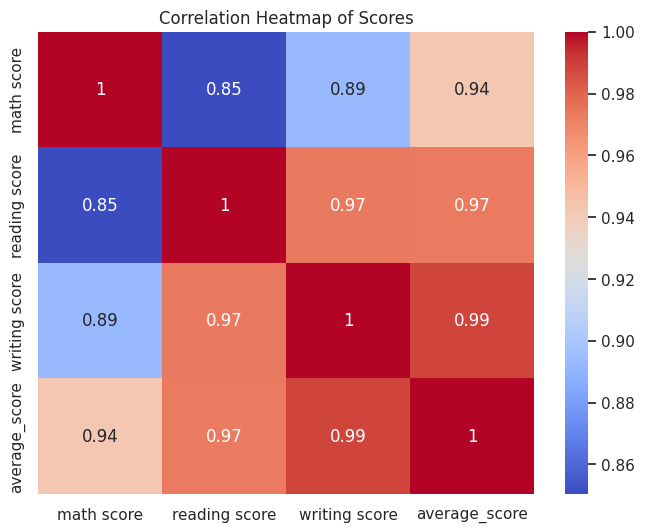

In [21]:
plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes(include=['int64', 'float64']).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Scores")
plt.show()